In [2]:
# Imports
import sklearn
import scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('AviationData2.csv')

In [4]:
df

,NtsbNo,EventType,Mkey,EventDate,City,State,Country,ReportNo,N,HasSafetyRec,...,PurposeOfFlight,FAR,AirCraftDamage,WeatherCondition,Operator,ReportStatus,RepGenFlag,DocketUrl,DocketPublishDate,Unnamed: 37
0,DCA24WA087,ACC,193738,2024-02-01T03:08:00Z,Tokoname,NaN,Japan,NaN,JA899A,False,...,NaN,NUSC,NaN,NaN,All Nippon Airways,NaN,False,NaN,NaN,NaN
1,GAA24WA073,ACC,193695,2024-01-20T12:30:00Z,Murcott,NaN,United Kingdom,NaN,GNEWT,False,...,NaN,NUSN,Unknown,NaN,NaN,NaN,False,NaN,NaN,NaN
2,GAA24WA067,ACC,193623,2024-01-07T23:07:00Z,Lizard Island,NaN,Australia,NaN,VH-NWJ,False,...,NaN,UNK,Substantial,NaN,NaN,NaN,False,NaN,NaN,NaN
3,DCA24WA071,ACC,193655,2024-01-06T03:28:00Z,Mar del Plata,NaN,Argentina,NaN,LV-KJE,False,...,NaN,NUSC,Substantial,NaN,NaN,NaN,False,NaN,NaN,NaN
4,CEN24LA075,ACC,193582,2024-01-01T16:40:00Z,Mansfield,Louisiana,United States,NaN,N9729L,False,...,PERS,091,Destroyed,VMC,NaN,Completed,False,https://data.ntsb.gov/Docket?ProjectID=193582,2/8/2024 6:00:00 PM,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142461,NYC62A0005,ACC,115930,1962-01-16T05:00:00Z,LIMESTONE,Maine,United States,NaN,N9903F,False,...,NaN,091,Substantial,VFR,NaN,Completed,False,NaN,NaN,NaN
142462,MIA62A0003,ACC,123569,1962-01-14T05:00:00Z,BIRMINGHAM,Alabama,United States,NaN,N5540,False,...,NaN,NaN,Substantial,VFR,EASTERN AIR LINES INC,Completed,False,NaN,NaN,NaN
142463,LAX62A0002,ACC,150606,1962-01-13T05:00:00Z,FILLMORE,California,United States,NaN,N37538,False,...,NaN,NaN,NaN,VFR,UNITED AIR LINES INC,Completed,False,NaN,NaN,NaN
142464,MIA62A0001,ACC,139827,1962-01-01T05:00:00Z,CHARLOTTE,North Carolina,United States,NaN,N2703R,False,...,NaN,NaN,Substantial,VFR,PIEDMONT AVIATION INC,Completed,False,NaN,NaN,NaN


In [5]:
df.shape

(142466, 38)

## Data cleaning and preprocessing

In [6]:
df.isna().sum().sort_values(ascending=False)

Unnamed: 37            142466
ReportNo               142155
Scheduled              134676
DocketUrl              126575
DocketPublishDate      126575
Operator               105813
AirportID              102797
ProbableCause           97167
HighestInjuryLevel      86531
EventID                 65955
AirportName             46406
OriginalPublishDate     13508
PurposeOfFlight          8290
State                    5358
FAR                      4374
ReportType               3488
ReportStatus             3416
NumberOfEngines          2621
WeatherCondition         2128
AirCraftDamage           1485
Country                   310
Model                      36
City                       31
N                          28
Make                        5
RepGenFlag                  0
NtsbNo                      0
AmateurBuilt                0
AirCraftCategory            0
EventType                   0
Latitude                    0
MinorInjuryCount            0
SeriousInjuryCount          0
FatalInjur

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(142466, 38)

In [9]:
# Let's remove columns we are not interested in
df.columns

Index(['NtsbNo', 'EventType', 'Mkey', 'EventDate', 'City', 'State', 'Country',
       'ReportNo', 'N', 'HasSafetyRec', 'ReportType', 'OriginalPublishDate',
       'HighestInjuryLevel', 'FatalInjuryCount', 'SeriousInjuryCount',
       'MinorInjuryCount', 'ProbableCause', 'EventID', 'Latitude', 'Longitude',
       'Make', 'Model', 'AirCraftCategory', 'AirportID', 'AirportName',
       'AmateurBuilt', 'NumberOfEngines', 'Scheduled', 'PurposeOfFlight',
       'FAR', 'AirCraftDamage', 'WeatherCondition', 'Operator', 'ReportStatus',
       'RepGenFlag', 'DocketUrl', 'DocketPublishDate', 'Unnamed: 37'],
      dtype='object')

In [10]:
df.drop(columns=[
    'Mkey',
    'ReportNo',
    'N', # N is the ID of the plane
    'HasSafetyRec',
    'ReportType',
    'EventID',
    'Latitude',
    'Longitude',
    'Unnamed: 37',
    'DocketPublishDate',
    'DocketUrl',
    'AirportID',
    'AirportName',
    'ReportStatus',
    'Operator',
    'AmateurBuilt',
    'NtsbNo',
    'OriginalPublishDate',
    'FAR',
    'RepGenFlag',
    'Scheduled',
    'EventType'
    
], inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142466 entries, 0 to 142465
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   EventDate           142466 non-null  object
 1   City                142435 non-null  object
 2   State               137108 non-null  object
 3   Country             142156 non-null  object
 4   HighestInjuryLevel  55935 non-null   object
 5   FatalInjuryCount    142466 non-null  int64 
 6   SeriousInjuryCount  142466 non-null  int64 
 7   MinorInjuryCount    142466 non-null  int64 
 8   ProbableCause       45299 non-null   object
 9   Make                142461 non-null  object
 10  Model               142430 non-null  object
 11  AirCraftCategory    142466 non-null  object
 12  NumberOfEngines     139845 non-null  object
 13  PurposeOfFlight     134176 non-null  object
 14  AirCraftDamage      140981 non-null  object
 15  WeatherCondition    140338 non-null  object
dtypes:

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142466 entries, 0 to 142465
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   EventDate           142466 non-null  object
 1   City                142435 non-null  object
 2   State               137108 non-null  object
 3   Country             142156 non-null  object
 4   HighestInjuryLevel  55935 non-null   object
 5   FatalInjuryCount    142466 non-null  int64 
 6   SeriousInjuryCount  142466 non-null  int64 
 7   MinorInjuryCount    142466 non-null  int64 
 8   ProbableCause       45299 non-null   object
 9   Make                142461 non-null  object
 10  Model               142430 non-null  object
 11  AirCraftCategory    142466 non-null  object
 12  NumberOfEngines     139845 non-null  object
 13  PurposeOfFlight     134176 non-null  object
 14  AirCraftDamage      140981 non-null  object
 15  WeatherCondition    140338 non-null  object
dtypes:

In [13]:
df.isna().sum().sort_values(ascending=False)

ProbableCause         97167
HighestInjuryLevel    86531
PurposeOfFlight        8290
State                  5358
NumberOfEngines        2621
WeatherCondition       2128
AirCraftDamage         1485
Country                 310
Model                    36
City                     31
Make                      5
EventDate                 0
FatalInjuryCount          0
SeriousInjuryCount        0
MinorInjuryCount          0
AirCraftCategory          0
dtype: int64

In [14]:
# Probable cause would be a valuable metric, however that information is missing from a really large number of entries. Therefore, the column will be dropped.
df.drop('ProbableCause', axis=1, inplace=True)  

In [15]:
# State is not super important, so we will drop it as well, along with PurposeOfFlight, Make and Model
df.drop(columns=['PurposeOfFlight', 'State', 'Make', 'Model'], axis=1, inplace=True)  

In [16]:
df.isna().sum().sort_values(ascending=False)

HighestInjuryLevel    86531
NumberOfEngines        2621
WeatherCondition       2128
AirCraftDamage         1485
Country                 310
City                     31
EventDate                 0
FatalInjuryCount          0
SeriousInjuryCount        0
MinorInjuryCount          0
AirCraftCategory          0
dtype: int64

In [17]:
# HighestInjuryLevel can be extracted from the injury counts, which don't have any missing values, so we will remove this column as well and extract the information later
df.drop('HighestInjuryLevel', axis=1, inplace=True)  

In [18]:
df.isna().sum().sort_values(ascending=False)

NumberOfEngines       2621
WeatherCondition      2128
AirCraftDamage        1485
Country                310
City                    31
EventDate                0
FatalInjuryCount         0
SeriousInjuryCount       0
MinorInjuryCount         0
AirCraftCategory         0
dtype: int64

In [19]:
# Now we are left with all the information we want and reduced the number of missing values significantly
df.shape

(142466, 10)

In [20]:
# Given the shear amount of data, it's acceptable to simply drop the null values
df.dropna(inplace=True)
df.shape

(137512, 10)

In [21]:
df.isna().sum().sort_values(ascending=False)

EventDate             0
City                  0
Country               0
FatalInjuryCount      0
SeriousInjuryCount    0
MinorInjuryCount      0
AirCraftCategory      0
NumberOfEngines       0
AirCraftDamage        0
WeatherCondition      0
dtype: int64

In [22]:
# Now let's change the types of the numerical data that are mistakenly described as objects
df.EventDate = pd.to_datetime(df.EventDate)

In [23]:
df.NumberOfEngines.value_counts()

NumberOfEngines
1        117795
2         16947
1,1        1342
4           578
3           221
2,2         132
2,1         132
1,2         122
0           108
4,2          19
1,           18
,            12
,1           11
2,3          10
1,0          10
0,1           8
4,4           6
2,4           5
1,4           4
2,            4
1,3           3
3,4           3
3,2           3
4,1           3
3,1           3
,2            3
3,3           1
2,2,2         1
4,3           1
1,1,1         1
0,0           1
2,0           1
1,1,0         1
4,            1
,4            1
6,1           1
Name: count, dtype: int64

In [24]:
# The number of engines seems to be in a strange format, let's check
df.loc[df.NumberOfEngines == '1,1']

,EventDate,City,Country,FatalInjuryCount,SeriousInjuryCount,MinorInjuryCount,AirCraftCategory,NumberOfEngines,AirCraftDamage,WeatherCondition
145,2023-08-01 17:37:00+00:00,Long Beach,United States,0,0,0,"AIR,AIR","1,1","Minor,Substantial",VMC
314,2023-05-22 11:00:00+00:00,Gueydan,United States,0,0,0,"AIR,AIR","1,1","Substantial,Substantial",VMC
437,2023-03-17 13:40:00+00:00,Mesa,United States,0,1,0,"AIR,AIR","1,1","Substantial,Substantial",VMC
450,2023-03-07 14:04:00+00:00,Hillsboro,United States,0,0,0,"AIR,AIR","1,1","Substantial,Minor",VMC
561,2022-12-27 05:00:00+00:00,Brookshire,United States,0,0,0,"AIR,AIR","1,1","Substantial,Minor",VMC
...,...,...,...,...,...,...,...,...,...,...
140972,1964-04-30 04:00:00+00:00,ENID,United States,0,0,0,"AIR,AIR","1,1","Minor,Substantial",VFR
141161,1964-04-15 04:00:00+00:00,TOLLESON,United States,0,0,0,"AIR,AIR","1,1","Minor,Minor",VFR
141779,1964-02-22 05:00:00+00:00,ALBUQUERQUE,United States,0,0,0,"AIR,AIR","1,1","Substantial,Minor",VFR
142110,1964-01-22 05:00:00+00:00,MOULTRIE,United States,0,0,0,"AIR,AIR","1,1","Substantial,Minor",VFR


In [25]:
# We can see now that more than one aircraft has been involved in this accident, so the number for each airplane is separated by a comma. Let's check for aircraft type
df.AirCraftCategory.value_counts()

AirCraftCategory
AIR            135649
AIR,AIR          1762
AIR,HELI           32
HELI,AIR           24
AIR,GLI            21
GLI,AIR            13
AIR,ULTR            4
AIR,AIR,AIR         2
AIR,UNK             1
AIR,AIR,GLI         1
PPAR,AIR            1
AIR,                1
GYRO,AIR            1
Name: count, dtype: int64

In [26]:
# We are only interested in accidents involving airplanes, so we can remove some of this data
itemList = ['HELI', 'UNK', 'GLI', 'ULTR', 'GYRO', 'PPAR']
for string in itemList:
    df.drop(df[df.AirCraftCategory.str.contains(string)].index, inplace=True)

In [27]:
df.AirCraftCategory.value_counts()

AirCraftCategory
AIR            135649
AIR,AIR          1762
AIR,AIR,AIR         2
AIR,                1
Name: count, dtype: int64

In [28]:
df.drop(df[df.AirCraftCategory == 'AIR,'].index, inplace=True)

In [29]:
df.AirCraftCategory.value_counts()

AirCraftCategory
AIR            135649
AIR,AIR          1762
AIR,AIR,AIR         2
Name: count, dtype: int64

## Exploratory Analysis and Feature Engineering

In [30]:
# Let's extract the date and the time of the accidents
df.EventDate = pd.to_datetime(df.EventDate)
df.EventDate = df.EventDate.dt.tz_convert('US/Eastern')

In [31]:
# Let's first extract some relevant information from the data and create new columns
df['EventTime'] = df.EventDate.dt.timetz

In [32]:
df.EventTime

4         11:40:00
5         06:57:00
6         08:15:00
9         12:44:00
10        08:15:00
            ...   
142460    00:00:00
142461    00:00:00
142462    00:00:00
142464    00:00:00
142465    11:55:00
Name: EventTime, Length: 137413, dtype: object

In [33]:
df.EventTime = df.EventTime.astype(str).str.replace(':', '')


In [34]:
df.EventTime

4         114000
5         065700
6         081500
9         124400
10        081500
           ...  
142460    000000
142461    000000
142462    000000
142464    000000
142465    115500
Name: EventTime, Length: 137413, dtype: object

In [35]:
df.EventTime = df.EventTime.astype(int)
df.EventTime

4         114000
5          65700
6          81500
9         124400
10         81500
           ...  
142460         0
142461         0
142462         0
142464         0
142465    115500
Name: EventTime, Length: 137413, dtype: int64

In [36]:
df.columns

Index(['EventDate', 'City', 'Country', 'FatalInjuryCount',
       'SeriousInjuryCount', 'MinorInjuryCount', 'AirCraftCategory',
       'NumberOfEngines', 'AirCraftDamage', 'WeatherCondition', 'EventTime'],
      dtype='object')

In [37]:
df.EventDate = pd.to_datetime(df.EventDate.dt.strftime('%Y-%m-%d'))

In [38]:
df.EventDate

4        2024-01-01
5        2023-12-28
6        2023-12-26
9        2023-12-12
10       2023-12-11
            ...    
142460   1962-01-20
142461   1962-01-16
142462   1962-01-14
142464   1962-01-01
142465   1948-10-24
Name: EventDate, Length: 137413, dtype: datetime64[ns]

In [39]:
df.head()

,EventDate,City,Country,FatalInjuryCount,SeriousInjuryCount,MinorInjuryCount,AirCraftCategory,NumberOfEngines,AirCraftDamage,WeatherCondition,EventTime
4,2024-01-01,Mansfield,United States,0,0,0,AIR,1,Destroyed,VMC,114000
5,2023-12-28,Lake Havasu,United States,0,0,1,AIR,1,Substantial,VMC,65700
6,2023-12-26,Ponca City,United States,0,0,0,AIR,2,Substantial,VMC,81500
9,2023-12-12,Sidney,United States,0,0,0,AIR,1,Substantial,VMC,124400
10,2023-12-11,Newport News,United States,0,0,0,AIR,1,Unknown,VMC,81500


In [40]:
# Let's make the date the index of the data frame
df.set_index(df.EventDate, inplace=True)
df.drop(columns='EventDate', inplace=True)
df.head()

,City,Country,FatalInjuryCount,SeriousInjuryCount,MinorInjuryCount,AirCraftCategory,NumberOfEngines,AirCraftDamage,WeatherCondition,EventTime
EventDate,,,,,,,,,,
2024-01-01,Mansfield,United States,0,0,0,AIR,1,Destroyed,VMC,114000
2023-12-28,Lake Havasu,United States,0,0,1,AIR,1,Substantial,VMC,65700
2023-12-26,Ponca City,United States,0,0,0,AIR,2,Substantial,VMC,81500
2023-12-12,Sidney,United States,0,0,0,AIR,1,Substantial,VMC,124400
2023-12-11,Newport News,United States,0,0,0,AIR,1,Unknown,VMC,81500


In [41]:
# Let's extract the year from the date. That can be useful to determine how accidents have changed through the years
df['Year'] = df.index.year

In [42]:
df.head()

,City,Country,FatalInjuryCount,SeriousInjuryCount,MinorInjuryCount,AirCraftCategory,NumberOfEngines,AirCraftDamage,WeatherCondition,EventTime,Year
EventDate,,,,,,,,,,,
2024-01-01,Mansfield,United States,0,0,0,AIR,1,Destroyed,VMC,114000,2024
2023-12-28,Lake Havasu,United States,0,0,1,AIR,1,Substantial,VMC,65700,2023
2023-12-26,Ponca City,United States,0,0,0,AIR,2,Substantial,VMC,81500,2023
2023-12-12,Sidney,United States,0,0,0,AIR,1,Substantial,VMC,124400,2023
2023-12-11,Newport News,United States,0,0,0,AIR,1,Unknown,VMC,81500,2023


In [43]:
# Let's create a new column to store the accident severity based on the amount and type of injury
df['AccidentSeverity'] = pd.Series()

In [44]:
df.loc[df.FatalInjuryCount > 0, 'AccidentSeverity'] = 'Fatal'
df.loc[(df.SeriousInjuryCount > 0) & (df.FatalInjuryCount == 0), 'AccidentSeverity'] = 'Serious'
df.loc[(df.MinorInjuryCount > 0) & (df.SeriousInjuryCount == 0) & (df.FatalInjuryCount == 0), 'AccidentSeverity'] = 'Minor'
df.loc[(df.MinorInjuryCount == 0) & (df.SeriousInjuryCount == 0) & (df.FatalInjuryCount == 0), 'AccidentSeverity'] = 'No injuries'

In [45]:
# Let's rename these columns for brevity
df.rename(columns={'FatalInjuryCount': 'FatalInjuries', 
                   'SeriousInjuryCount': 'SeriousInjuries',
                   'MinorInjuryCount': 'MinorInjuries'}, inplace=True)

In [46]:
df.AccidentSeverity.value_counts()

AccidentSeverity
No injuries    85000
Fatal          22089
Minor          18800
Serious        11524
Name: count, dtype: int64

In [47]:
# Let's transform the category of the aircraft into the number of airplanes involved in the accident, since they all have the type "Airplane"
df.AirCraftCategory.value_counts()

AirCraftCategory
AIR            135649
AIR,AIR          1762
AIR,AIR,AIR         2
Name: count, dtype: int64

In [48]:
df['NumberOfAircraftInvolved'] = df.AirCraftCategory.str.count('AIR')

In [49]:
df.NumberOfAircraftInvolved.value_counts()

NumberOfAircraftInvolved
1    135649
2      1762
3         2
Name: count, dtype: int64

In [50]:
df.head()

,City,Country,FatalInjuries,SeriousInjuries,MinorInjuries,AirCraftCategory,NumberOfEngines,AirCraftDamage,WeatherCondition,EventTime,Year,AccidentSeverity,NumberOfAircraftInvolved
EventDate,,,,,,,,,,,,,
2024-01-01,Mansfield,United States,0,0,0,AIR,1,Destroyed,VMC,114000,2024,No injuries,1
2023-12-28,Lake Havasu,United States,0,0,1,AIR,1,Substantial,VMC,65700,2023,Minor,1
2023-12-26,Ponca City,United States,0,0,0,AIR,2,Substantial,VMC,81500,2023,No injuries,1
2023-12-12,Sidney,United States,0,0,0,AIR,1,Substantial,VMC,124400,2023,No injuries,1
2023-12-11,Newport News,United States,0,0,0,AIR,1,Unknown,VMC,81500,2023,No injuries,1


In [51]:
# Now we can remove the category of aircraft
df.drop(columns=['AirCraftCategory'], inplace=True)
df.head()

,City,Country,FatalInjuries,SeriousInjuries,MinorInjuries,NumberOfEngines,AirCraftDamage,WeatherCondition,EventTime,Year,AccidentSeverity,NumberOfAircraftInvolved
EventDate,,,,,,,,,,,,
2024-01-01,Mansfield,United States,0,0,0,1,Destroyed,VMC,114000,2024,No injuries,1
2023-12-28,Lake Havasu,United States,0,0,1,1,Substantial,VMC,65700,2023,Minor,1
2023-12-26,Ponca City,United States,0,0,0,2,Substantial,VMC,81500,2023,No injuries,1
2023-12-12,Sidney,United States,0,0,0,1,Substantial,VMC,124400,2023,No injuries,1
2023-12-11,Newport News,United States,0,0,0,1,Unknown,VMC,81500,2023,No injuries,1


In [52]:
df.WeatherCondition.value_counts()

WeatherCondition
VFR        69498
VMC        56040
IFR         5523
IMC         4924
UNK          864
Unknown      564
Name: count, dtype: int64

In [53]:
# Let's consolidate the unknown values
df.loc[df.WeatherCondition == 'Unknown', 'WeatherCondition'] = 'UNK'

In [54]:
df.WeatherCondition.value_counts()

WeatherCondition
VFR    69498
VMC    56040
IFR     5523
IMC     4924
UNK     1428
Name: count, dtype: int64

In [55]:
df.head()

,City,Country,FatalInjuries,SeriousInjuries,MinorInjuries,NumberOfEngines,AirCraftDamage,WeatherCondition,EventTime,Year,AccidentSeverity,NumberOfAircraftInvolved
EventDate,,,,,,,,,,,,
2024-01-01,Mansfield,United States,0,0,0,1,Destroyed,VMC,114000,2024,No injuries,1
2023-12-28,Lake Havasu,United States,0,0,1,1,Substantial,VMC,65700,2023,Minor,1
2023-12-26,Ponca City,United States,0,0,0,2,Substantial,VMC,81500,2023,No injuries,1
2023-12-12,Sidney,United States,0,0,0,1,Substantial,VMC,124400,2023,No injuries,1
2023-12-11,Newport News,United States,0,0,0,1,Unknown,VMC,81500,2023,No injuries,1


In [56]:
df.Country.value_counts()

Country
United States                     135946
Mexico                               313
Bahamas                              263
Canada                               170
Brazil                                44
                                   ...  
French Guiana                          1
St Vincent And The Grenadines          1
Republic Of Korea                      1
Federated States Of Micronesia         1
Wake Island                            1
Name: count, Length: 118, dtype: int64

In [57]:
df.AirCraftDamage.value_counts()

AirCraftDamage
Substantial                          105543
Destroyed                             29682
Substantial,Substantial                 618
Minor                                   398
Destroyed,Destroyed                     331
Minor,Substantial                       229
Substantial,Minor                       222
Destroyed,Substantial                   132
Substantial,Destroyed                   121
Destroyed,Minor                          35
Minor,Destroyed                          30
Unknown                                  26
Substantial,None                         20
None,Substantial                         14
None,Minor                                2
None,Destroyed                            2
Minor,Minor                               2
Substantial,Unknown                       1
Destroyed,Substantial,Substantial         1
Destroyed,None                            1
Substantial,Substantial,Minor             1
,Destroyed                                1
Minor,None       

In [58]:
# To help our model, let's use the most severe damage to give this column only one description
df.loc[df.AirCraftDamage.str.contains('Destroyed'), 'AirCraftDamage'] = 'Destroyed'
df.loc[df.AirCraftDamage.str.contains('Substantial'), 'AirCraftDamage'] = 'Substantial'
df.loc[df.AirCraftDamage.str.contains('Minor'), 'AirCraftDamage'] = 'Minor'
df.loc[df.AirCraftDamage.str.contains('Unknown'), 'AirCraftDamage'] = 'Unknown'

df.AirCraftDamage.value_counts()

AirCraftDamage
Substantial    106648
Destroyed       30336
Minor             403
Unknown            26
Name: count, dtype: int64

In [59]:
df.describe()

,FatalInjuries,SeriousInjuries,MinorInjuries,EventTime,Year,NumberOfAircraftInvolved
count,137413.000000,137413.000000,137413.000000,137413.000000,137413.000000,137413.000000
mean,0.380211,0.165559,0.277150,54466.789896,1983.454542,1.012852
std,3.003200,0.809989,1.237051,66705.933479,15.658758,0.112764
min,0.000000,0.000000,0.000000,0.000000,1948.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,1970.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,1979.000000,1.000000
75%,0.000000,0.000000,0.000000,104000.000000,1994.000000,1.000000
max,574.000000,86.000000,137.000000,235900.000000,2024.000000,3.000000


We can see that the EventTime median is 0, equivalent to 00:00 EST, which tells us this is probably a missing value, in fact.

<Axes: xlabel='EventTime', ylabel='Count'>

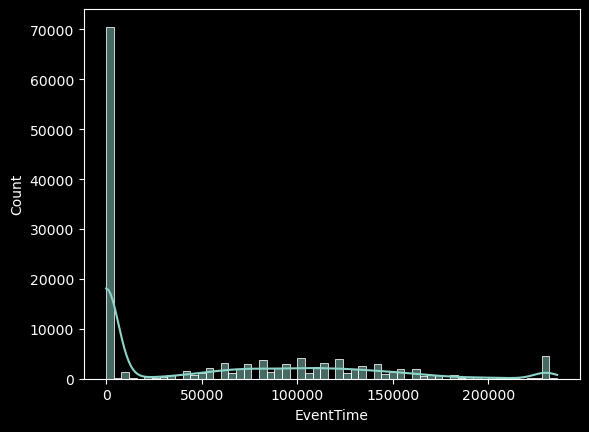

In [60]:
sns.histplot(df.EventTime, kde=True)

In [61]:
df.loc[df.EventTime == 0, 'Year'].value_counts()

Year
1967    5387
1966    5100
1965    4615
1964    4538
1968    4380
1969    4190
1970    4119
1971    4019
1978    3696
1977    3629
1972    3609
1973    3515
1976    3512
1975    3349
1979    3276
1974    3133
1980    3053
1981    3001
1962      58
1963      58
1982      32
1984      12
1996      10
1983      10
1985      10
1988       9
2014       9
1987       9
1995       9
2001       8
2000       6
1989       6
1993       5
2010       5
2017       5
2015       5
2013       5
1998       5
2005       5
1986       5
2002       5
1997       4
2012       4
1999       4
2007       4
2016       4
1990       4
2018       4
2019       4
2011       4
1991       3
1992       3
2003       3
2009       3
2008       2
2020       2
2022       2
2021       1
1994       1
2006       1
Name: count, dtype: int64

In [62]:
df.loc[df.EventTime == 0, 'Year'].value_counts().sum()


70469

In [63]:
df.loc[df.EventTime == 10000, 'Year'].value_counts().sum()

1263

In [64]:
df.loc[df.EventTime == 230000, 'Year'].value_counts().sum()


4450

The fact that most of the 0 values are concentrated in accidents which occured more than 40 years ago is one more clue that these are actually missing values. In that case, we will, instead of simply removing the values, replace them with the median. However, to find the real median, we need to remove the 0 values first. Let's bear in mind that the missing values are not only 0, but concentrated around it.

In [65]:
df.EventTime.loc[(df.EventTime == 0) | (df.EventTime == 10000) | (df.EventTime == 230000)] = None

In [66]:
df.EventTime.sample(15)

EventDate
1978-07-25         NaN
2019-11-03    185000.0
1970-03-11         NaN
1971-12-25         NaN
2021-09-23     64400.0
1965-08-12         NaN
1994-01-07     93000.0
1972-05-26         NaN
1966-07-11         NaN
1964-07-31         NaN
1966-09-17         NaN
1969-12-06         NaN
1972-11-26         NaN
1968-06-11         NaN
1973-03-30         NaN
Name: EventTime, dtype: float64

<Axes: xlabel='EventTime', ylabel='Count'>

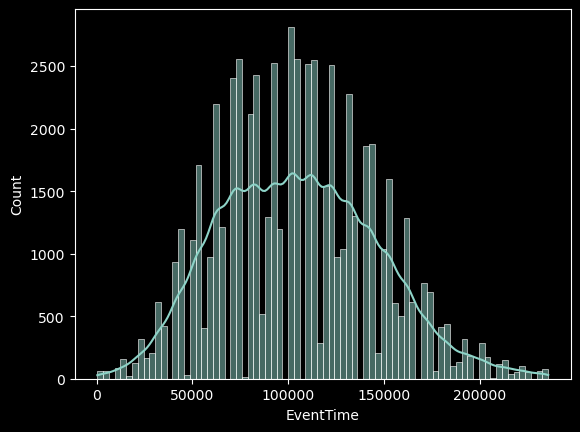

In [67]:
sns.histplot(df.EventTime, kde=True)

In [68]:
df.EventTime.describe()

count     61231.000000
mean     105311.280234
std       41308.368599
min         300.000000
25%       73000.000000
50%      103000.000000
75%      133000.000000
max      235900.000000
Name: EventTime, dtype: float64

In [69]:
df_time = df.dropna()
df_time.shape

(61231, 12)

## Extracting insights with Multivariate Analysis

Now that our data is cleaned and organized, let's analyse the data and answer some questions




### What's the distribution of the variables?

In [70]:
#hist = pd.melt(df, value_vars = df)
#hist = sns.FacetGrid (hist, col = 'variable', col_wrap = 3, sharex = False, sharey = False)
#hist.map(sns.histplot, 'value')

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 137413 entries, 2024-01-01 to 1948-10-24
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   City                      137413 non-null  object 
 1   Country                   137413 non-null  object 
 2   FatalInjuries             137413 non-null  int64  
 3   SeriousInjuries           137413 non-null  int64  
 4   MinorInjuries             137413 non-null  int64  
 5   NumberOfEngines           137413 non-null  object 
 6   AirCraftDamage            137413 non-null  object 
 7   WeatherCondition          137413 non-null  object 
 8   EventTime                 61231 non-null   float64
 9   Year                      137413 non-null  int32  
 10  AccidentSeverity          137413 non-null  object 
 11  NumberOfAircraftInvolved  137413 non-null  int64  
dtypes: float64(1), int32(1), int64(4), object(6)
memory usage: 13.1+ MB


In [72]:
# Let's see the outlier distribution
df_box = df.drop(columns=[
    'City',
    'Country',
    'NumberOfEngines',
    'AirCraftDamage',
    'WeatherCondition',
    'AccidentSeverity'
])

In [73]:
df_box.columns

Index(['FatalInjuries', 'SeriousInjuries', 'MinorInjuries', 'EventTime',
       'Year', 'NumberOfAircraftInvolved'],
      dtype='object')

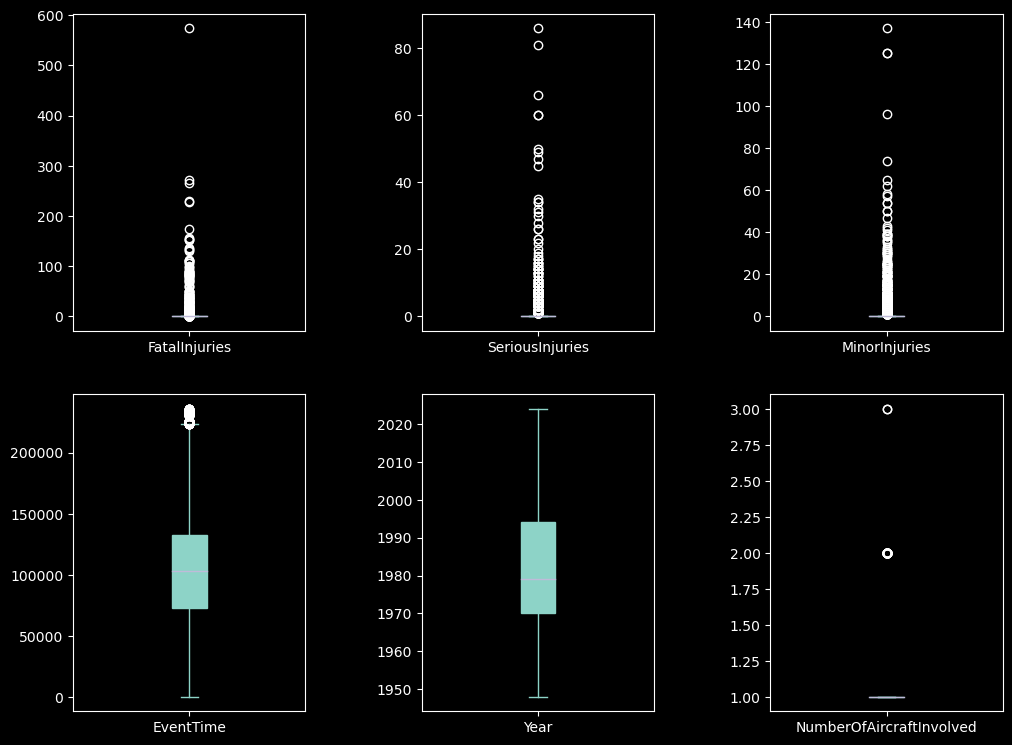

In [74]:
df_box.plot(subplots = True, layout = (3,3), kind = 'box', figsize = (12,14), patch_artist = True)
plt.subplots_adjust(wspace=0.5)

In [75]:
df_injuries = df_box.drop(columns=[
        'EventTime',
        'Year', 
        'NumberOfAircraftInvolved'
])

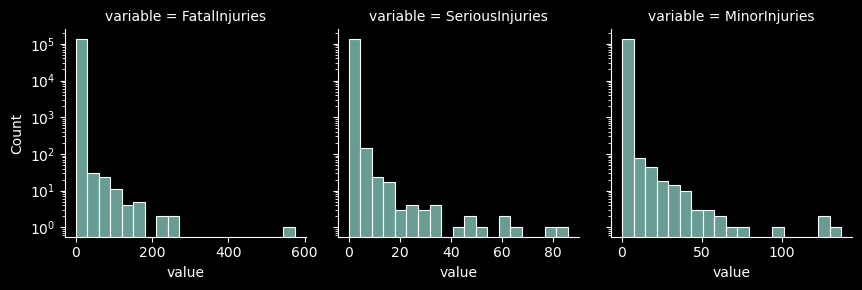

In [76]:
# Since the data is heavily skewed to high valued outliers, we'll plot these variables in logarithmic scale
hist = pd.melt(df_injuries, value_vars= df_injuries)
hist = sns.FacetGrid(hist, col = 'variable', col_wrap=3, sharex=False)
hist.map(sns.histplot, 'value').set(yscale='log')

In [77]:
df_hist = df_box.drop(columns=['FatalInjuries', 'SeriousInjuries', 'MinorInjuries'])

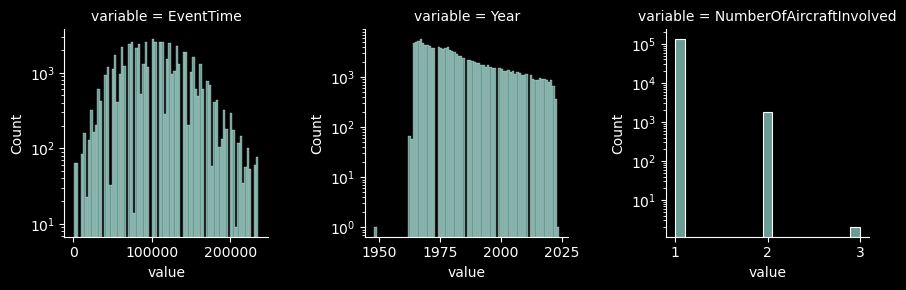

In [78]:
hist = pd.melt(df_hist, value_vars= df_hist)
hist = sns.FacetGrid(hist, col = 'variable', col_wrap=3, sharex=False, sharey=False)
hist.map(sns.histplot, 'value').set(yscale='log')

<Axes: xlabel='Year', ylabel='Count'>

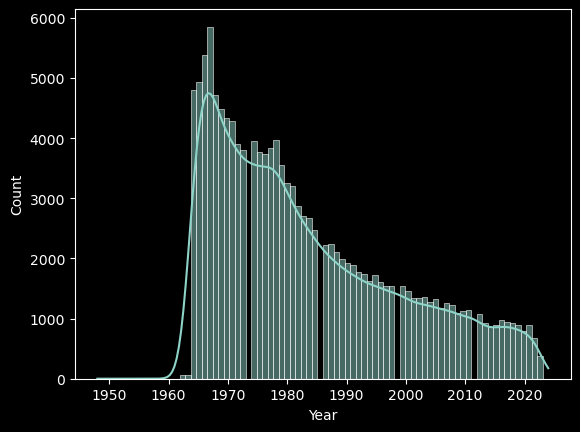

In [79]:
sns.histplot(df.Year, kde=True)

We can see that our numerical data are mostly not normal in distribution. Moreover, we know these outliers are not errors. The fact is that most airplane accidents involve small aircraft with one or two engines, but accidents involving big commercial airplanes do happen and skew the data upwards when it comes to injuries and fatalities. We shall confirm that with our model later.

### What's the proportion of accidents that happened on Visual vs Instrument conditions?

In [80]:
import plotly.express as px

In [81]:
# Let's create a data frame with the weather condition but with both the codes and wether the condition is visual or intrument
df_weather = pd.DataFrame(data=df.WeatherCondition)

In [82]:
df_weather['Condition'] = pd.Series()

In [83]:
df_weather.rename(columns={'WeatherCondition': 'Code'}, inplace=True)
df_weather

,Code,Condition
EventDate,,
2024-01-01,VMC,NaN
2023-12-28,VMC,NaN
2023-12-26,VMC,NaN
2023-12-12,VMC,NaN
2023-12-11,VMC,NaN
...,...,...
1962-01-20,VFR,NaN
1962-01-16,VFR,NaN
1962-01-14,VFR,NaN


In [84]:
df_weather.loc[df_weather.Code.str.contains('V'), 'Condition'] = 'Visual'
df_weather.loc[df_weather.Code.str.contains('I'), 'Condition'] = 'Instrument'
df_weather.loc[df_weather.Code.str.contains('UNK'), 'Condition'] = 'Unknown'


In [85]:
data = df_weather.value_counts()

In [86]:
data = pd.DataFrame(data)
data.reset_index(inplace=True)
data

,Code,Condition,count
0,VFR,Visual,69498
1,VMC,Visual,56040
2,IFR,Instrument,5523
3,IMC,Instrument,4924
4,UNK,Unknown,1428


In [87]:
data2 = data.groupby('Condition').sum().sort_values(by='count', ascending=False)

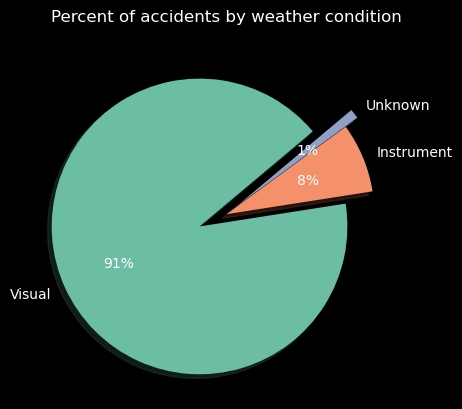

In [88]:
explode = (0.2, 0, 0.1)
palette = sns.color_palette('Set2', n_colors=3, desat=0.9)
fig, ax = plt.subplots()
ax.pie(data2['count'], explode=explode, labels=data2.index.to_list(), autopct='%0.0f%%',
       shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9}, startangle=40, colors=palette)
ax.set_title('Percent of accidents by weather condition')
plt.show()

### What's the distribution of severity of accidents?

In [92]:
df_severity = df.AccidentSeverity.value_counts().reset_index()
df_severity

,AccidentSeverity,count
0,No injuries,85000
1,Fatal,22089
2,Minor,18800
3,Serious,11524


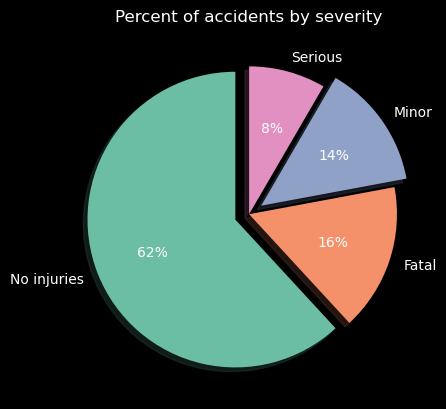

In [99]:
explode = (0.1, 0, 0.1, 0)
palette = sns.color_palette('Set2', n_colors=4, desat=0.9)
fig, ax = plt.subplots()
ax.pie(df_severity['count'], explode=explode, labels=df_severity.AccidentSeverity.to_list(), autopct='%0.0f%%',
       shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9}, startangle=90, colors=palette)
ax.set_title('Percent of accidents by severity')
plt.show()

### How have fatalities fared through the years?

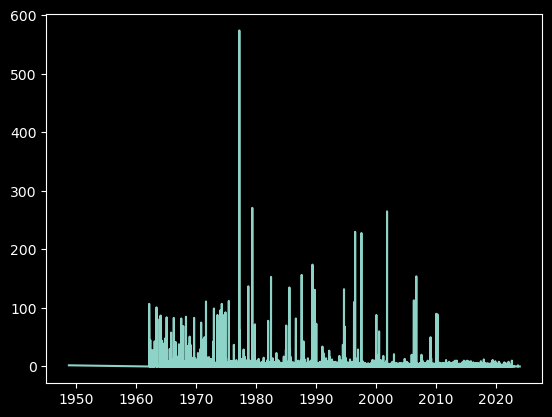

In [100]:
plt.plot(df.FatalInjuries)
plt.show()

In [107]:
df.sort_values(by='FatalInjuries', ascending=False).head()

,City,Country,FatalInjuries,SeriousInjuries,MinorInjuries,NumberOfEngines,AirCraftDamage,WeatherCondition,EventTime,Year,AccidentSeverity,NumberOfAircraftInvolved
EventDate,,,,,,,,,,,,
1977-03-27,TENERIFE,Spain,574,34,36,"4,4",Destroyed,IFR,NaN,1977,Fatal,2
1979-05-25,CHICAGO,United States,271,0,0,3,Destroyed,VFR,NaN,1979,Fatal,1
2001-11-12,Belle Harbor,United States,265,0,0,2,Destroyed,VMC,51600.0,2001,Fatal,1
1996-07-17,EAST MORICHES,United States,230,0,0,4,Destroyed,VMC,163100.0,1996,Fatal,1
1997-08-05,NIMITZ HILL,United States,228,26,0,4,Destroyed,IMC,214200.0,1997,Fatal,1


### What's the correlation of the variables?

In [114]:
numeric_data = df_box.reset_index()

In [116]:
numeric_data.drop(columns=['EventDate'], inplace=True)

In [117]:
numeric_data.head()

,FatalInjuries,SeriousInjuries,MinorInjuries,EventTime,Year,NumberOfAircraftInvolved
0,0,0,0,114000.0,2024,1
1,0,0,1,65700.0,2023,1
2,0,0,0,81500.0,2023,1
3,0,0,0,124400.0,2023,1
4,0,0,0,81500.0,2023,1


In [118]:
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_data, 
            annot = True, 
            cmap = 'flare', 
            cbar = True,
            square = True,
            fmt = '.2f')
plt.title('Matriz de Correlação')
plt.show()

KeyboardInterrupt: 